In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')


11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28), X_test shape: (10000, 28, 28)


In [3]:
from tensorflow.keras.utils import to_categorical

# convert image datatype from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalising piel values
X_train = X_train/255.0
X_test = X_test/255.0

# reshape images to add channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# One-hot encoding label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

# Layer 1
# Conv 1
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, activation = 'relu', input_shape = (28,28,1)))
# Pooling 1
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# Layer 2
# Conv 2
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, activation='relu'))
# Pooling 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Layer 3
# Fully connected layer 1
model.add(Dense(units=120, activation='relu'))

#Layer 4
#Fully connected layer 2
model.add(Dense(units=84, activation='relu'))

#Layer 5
#Output Layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
epochs = 20
batch_size = 512
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    steps_per_epoch=X_train.shape[0]//batch_size,
                    validation_data=(X_test, y_test),
                    validation_steps=X_test.shape[0]//batch_size, verbose = 1)

_, acc = model.evaluate(X_test, y_test, verbose = 1)
print('%.3f' % (acc * 100.0))




Epoch 1/20
117/117 [==============================] - 7s 9ms/step - loss: 0.7301 - accuracy: 0.8168 - val_loss: 0.1973 - val_accuracy: 0.9411
Epoch 2/20
117/117 [==============================] - 1s 7ms/step - loss: 0.1662 - accuracy: 0.9507 - val_loss: 0.1056 - val_accuracy: 0.9693
Epoch 3/20
117/117 [==============================] - 1s 8ms/step - loss: 0.1061 - accuracy: 0.9690 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 4/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.0630 - val_accuracy: 0.9805
Epoch 5/20
117/117 [==============================] - 1s 6ms/step - loss: 0.0686 - accuracy: 0.9787 - val_loss: 0.0536 - val_accuracy: 0.9825
Epoch 6/20
117/117 [==============================] - 1s 6ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0516 - val_accuracy: 0.9808
Epoch 7/20
117/117 [==============================] - 1s 6ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0441 - val_accuracy: 0.9854
Epoch 

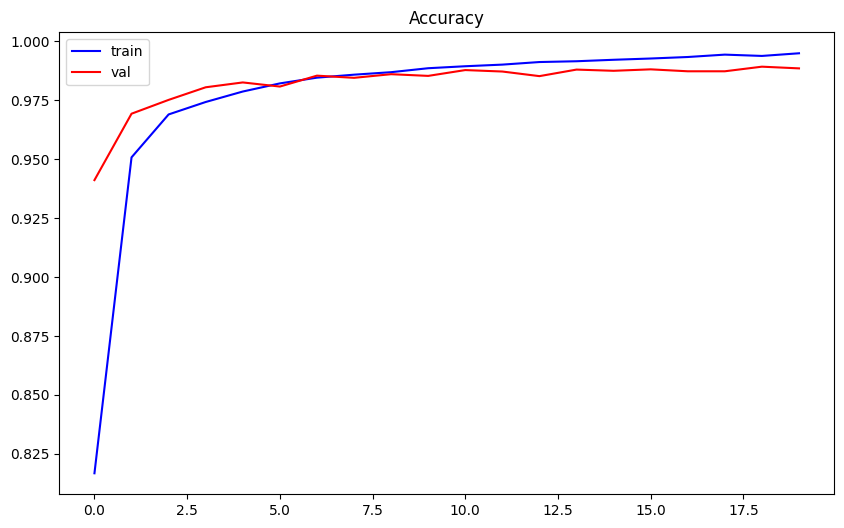

In [6]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
plt.legend()
plt.title('Accuracy')
plt.show()